In [89]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

Data Description
1. Multiclass classification problem with 3 labels: {1,2,3} representing 3 different cultivators
2. 13 continuous attributes describing the properties of wine like alcohol, Ash etc.
3. UCI Machine Learning Repository

In [90]:
# Load the wine dataset
data = pd.read_csv('wine_original.csv')
labels = data['class']
del data['class']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)

In [91]:
X_train

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
54,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.850000,0.92,3.20,1060
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.600000,0.77,2.31,600
148,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.420000,0.55,1.62,650
81,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.900000,1.16,3.14,714
88,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.800000,1.00,2.75,680
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.750000,0.98,1.59,450
136,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.850000,0.75,1.27,720
46,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.900000,1.04,3.44,1065
171,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.450000,1.22,2.87,420


In [92]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print ('Train accuracy = ' + str(np.sum(y_pred_train == y_train)*1.0/len(y_train)))
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Train accuracy = 1.0
Test accuracy = 0.861111111111


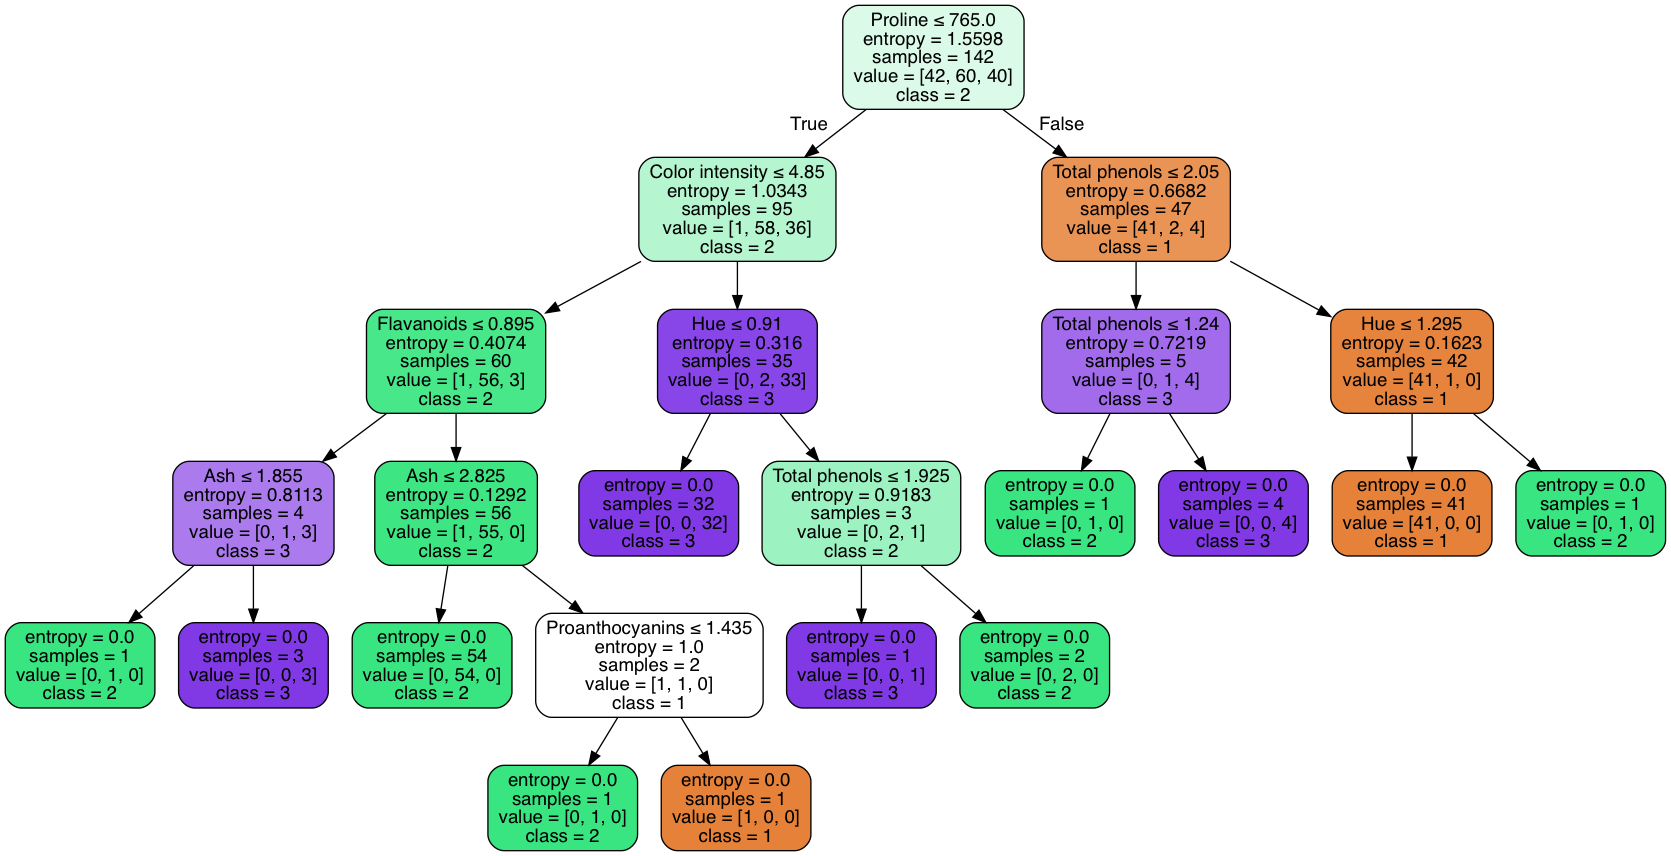

In [93]:
from IPython.display import Image  
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['1','2','3'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [94]:
# Max Depth of tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Test accuracy = 0.888888888889


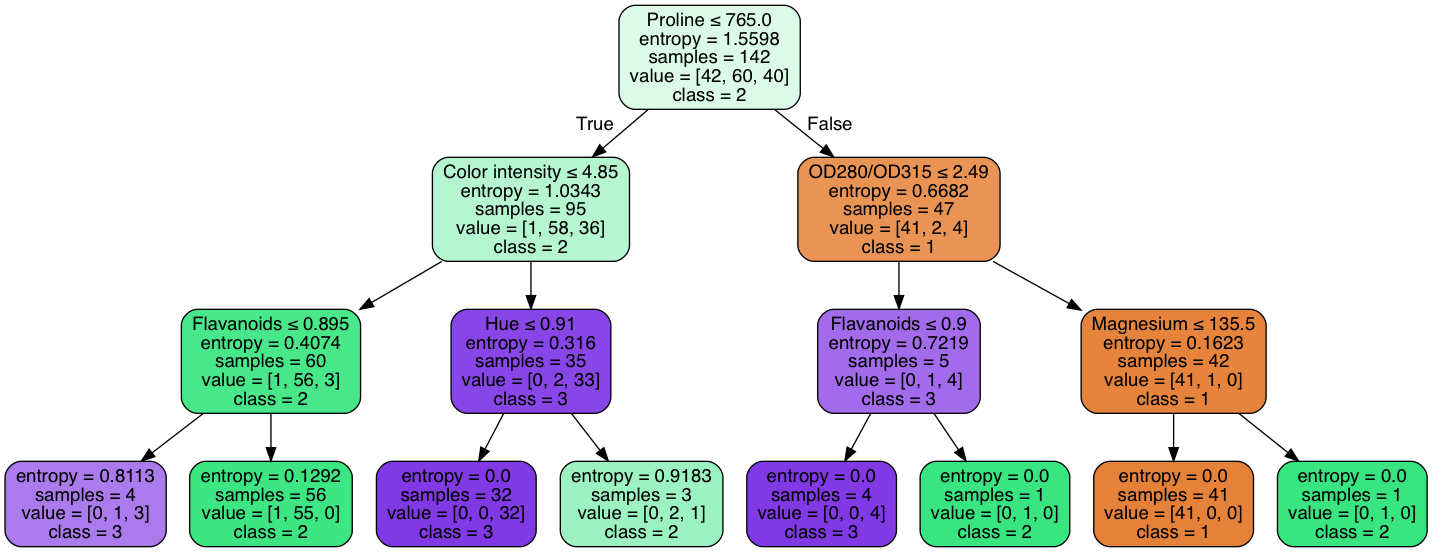

In [95]:
from IPython.display import Image  
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['1','2','3'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [96]:
X_test.loc[1]

Alcohol                   13.20
Malic acid                 1.78
Ash                        2.14
Alcalinity of ash         11.20
Magnesium                100.00
Total phenols              2.65
Flavanoids                 2.76
Nonflavanoid phenols       0.26
Proanthocyanins            1.28
Color intensity            4.38
Hue                        1.05
OD280/OD315                3.40
Proline                 1050.00
Name: 1, dtype: float64

In [97]:
y_pred[0]

1

In [98]:
#Min Sample Split
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Test accuracy = 0.861111111111


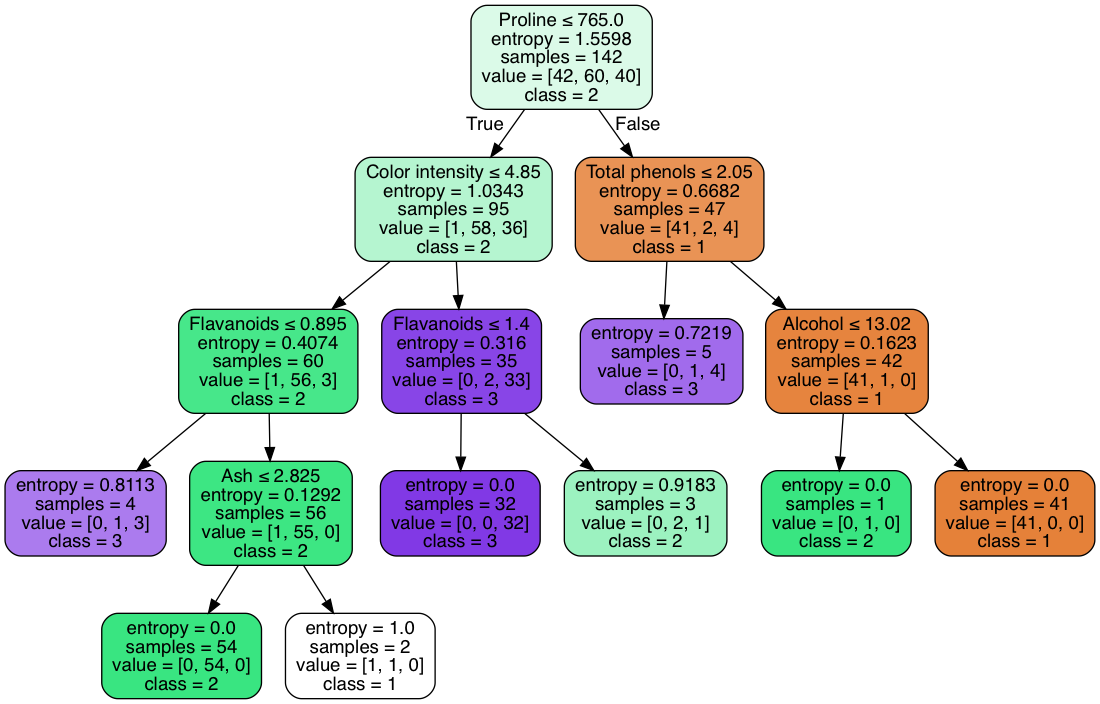

In [99]:
from IPython.display import Image  
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['1','2','3'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [100]:
#min samples leaf
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Test accuracy = 0.75


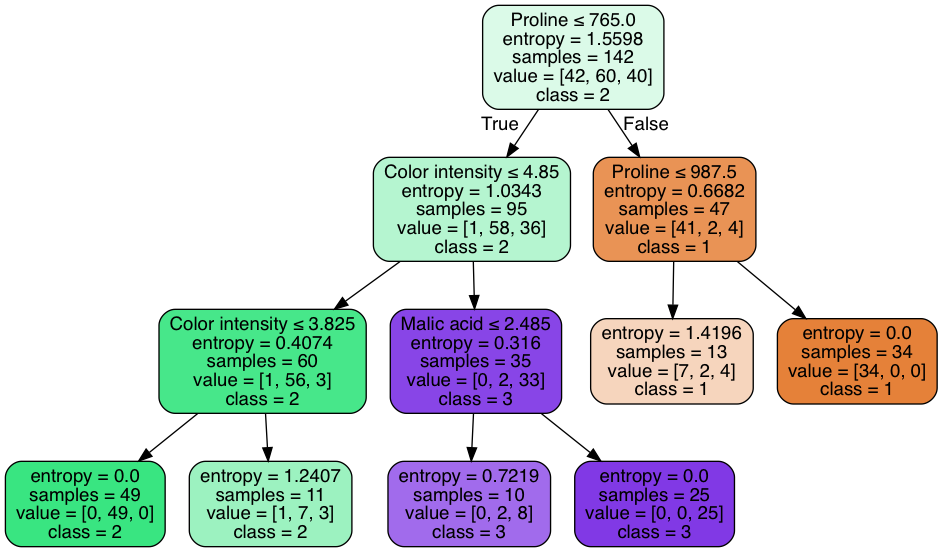

In [101]:
from IPython.display import Image  
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['1','2','3'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

PRACTICE PROBLEM
1. Clone and use ‘PracticeProb_Lec1.ipynb’ available on GitHub
2. Split Data into training/validation/test set
3. Train a decision tree model using sklearn
4. Select from min_samples_leaf = {2,5,10,20} on validation data
5. Report accuracy on test data

In [102]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5)